<a href="https://colab.research.google.com/github/TraderWilson/FinTech-Case-Study/blob/main/Asset_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Finding the efficient frontier using Monte Carlo simulations



## Set up the packages

In [ ]:
# Set up the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

pd.set_option('display.max_columns', None)

## Choose the assets & Set up parameters

In [ ]:
#Choose the assets
assets = ['AAPL', 'AMZN', 'GOOGL', 'JPM', 'LLY', 'MSFT', 'NFLX', 'NVDA', 'TSLA', 'XOM']
n_assets = len(assets)
n_portfolios = 10 ** 5
n_days = 252
rf_rate_1 = 0.02
rf_rate_2 = 0.055
markers = ['o', 'X', 'd', '*', 's', 'p', 'H', '<', '>', '+']

In [ ]:
#Set up the Monte Carlo Model parameters
np.random.seed(42)
weights = np.random.random(size = (n_portfolios, n_assets))
weights /= np.sum(weights, axis = 1)[:, np.newaxis]

## Load the data from Yahoo

In [ ]:
#Load the data
prices = yf.download(assets, start= '2017-01-01', period= 'max', auto_adjust= True)

[*********************100%%**********************]  10 of 10 completed


## Check the Data

In [ ]:
# Check a null counts and data types
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1689 entries, 2017-01-03 to 2023-09-19
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1689 non-null   float64
 1   (Close, AMZN)    1689 non-null   float64
 2   (Close, GOOGL)   1688 non-null   float64
 3   (Close, JPM)     1689 non-null   float64
 4   (Close, LLY)     1689 non-null   float64
 5   (Close, MSFT)    1689 non-null   float64
 6   (Close, NFLX)    1688 non-null   float64
 7   (Close, NVDA)    1689 non-null   float64
 8   (Close, TSLA)    1689 non-null   float64
 9   (Close, XOM)     1689 non-null   float64
 10  (High, AAPL)     1689 non-null   float64
 11  (High, AMZN)     1689 non-null   float64
 12  (High, GOOGL)    1688 non-null   float64
 13  (High, JPM)      1689 non-null   float64
 14  (High, LLY)      1689 non-null   float64
 15  (High, MSFT)     1689 non-null   float64
 16  (High, NFLX)     1688 non-null   float64
 

In [ ]:
prices.tail(5)

Close                                                  \
                  AAPL        AMZN       GOOGL         JPM         LLY   
Date                                                                     
2023-09-13  174.210007  144.850006  136.710007  146.410004  598.880005   
2023-09-14  175.740005  144.720001  138.100006  149.250000  591.609985   
2023-09-15  175.009995  140.389999  137.399994  148.809998  575.659973   
2023-09-18  177.970001  139.979996  138.210007  149.119995  571.280029   
2023-09-19  177.690002  136.399994         NaN  148.970001  577.162781   

                                                                        \
                  MSFT        NFLX        NVDA        TSLA         XOM   
Date                                                                     
2023-09-13  336.059998  412.239990  454.850006  271.299988  116.440002   
2023-09-14  338.700012  400.489990  455.809998  276.040009  118.519997   
2023-09-15  330.220001  396.940002  439.000000  274.390015  116.699997   
2023-09-18  329.059998  394.399994  439.660004  265.279999  117.639999   
2023-09-19  325.717285         NaN  435.360107  263.949890  117.949997   

                  High                                                  \
                  AAPL        AMZN       GOOGL         JPM         LLY   
Date                                                                     
2023-09-13  177.300003  144.979996  136.899994  147.699997  600.750000   
2023-09-14  176.100006  145.860001  138.699997  149.899994  601.840027   
2023-09-15  176.500000  143.570007  138.520004  149.729996  594.059998   
2023-09-18  179.380005  141.750000  139.160004  149.139999  578.000000   
2023-09-19  178.669998  138.839996         NaN  149.720001  578.409973   

                                                                        \
                  MSFT        NFLX        NVDA        TSLA         XOM   
Date                                                                     
2023-09-13  336.850006  438.399994  459.299988  274.980011  117.959999   
2023-09-14  340.859985  411.390015  459.869995  276.709991  118.660004   
2023-09-15  337.399994  404.700012  455.989990  278.980011  118.510002   
2023-09-18  330.399994  399.470001  442.420013  271.440002  118.239998   
2023-09-19  328.750000         NaN  439.660004  267.850006  118.839996   

                   Low                                                  \
                  AAPL        AMZN       GOOGL         JPM         LLY   
Date                                                                     
2023-09-13  173.979996  140.869995  134.149994  145.820007  591.700012   
2023-09-14  173.580002  142.949997  136.240005  147.520004  590.010010   
2023-09-15  173.820007  140.089996  136.479996  148.309998  575.059998   
2023-09-18  176.169998  139.220001  136.610001  147.750000  564.409973   
2023-09-19  177.130005  136.130005         NaN  148.850006  570.760010   

                                                                        \
                  MSFT        NFLX        NVDA        TSLA         XOM   
Date                                                                     
2023-09-13  331.170013  410.690002  445.029999  268.100006  115.900002   
2023-09-14  336.570007  400.000000  451.309998  270.420013  117.330002   
2023-09-15  329.649994  395.029999  438.079987  271.000000  116.500000   
2023-09-18  326.359985  392.600006  420.000000  263.760010  116.699997   
2023-09-19  324.870087         NaN  433.174896  261.200012  117.830002   

                  Open                                                  \
                  AAPL        AMZN       GOOGL         JPM         LLY   
Date                                                                     
2023-09-13  176.509995  140.949997  135.089996  147.339996  594.659973   
2023-09-14  174.000000  145.080002  137.600006  147.839996  599.239990   
2023-09-15  176.479996  142.690002  137.979996  148.919998  592.000000   
2023-09-18  176

## Manipulate the Data

In [ ]:
#Calculate individual asset returns & the corresponding standard deviation
returns = prices['Close'].pct_change().dropna()

In [ ]:
#Seperate the time phase due to the rate hike since 04/2022
returns_1 = returns.loc[:'2022-04-01']
returns_2 = returns.loc['2022-04-01':]
avg_returns_1 = returns_1.mean() * n_days
avg_returns_2 = returns_2.mean() * n_days
cov_matrix_1 = returns_1.cov() * n_days
cov_matrix_2 = returns_2.cov() * n_days

In [ ]:
"""
    Helper function to calculate the portfolio's volatility.

    Args:
        weights (np.array): An array containing the portfolio weights
        assets (list): list of the asset names
"""
def portf_vol(weights, cov_matrix):
  portf_vol = []
  for i in range(len(weights)):
    vol = np.sqrt(np.dot(weights[i].T, np.dot(cov_matrix, weights[i])))
    portf_vol.append(vol)
  portf_vol = np.array(portf_vol)
  return portf_vol

In [ ]:
#Calculate the portfolio matrixs for different time phrase
portf_rtns_1 = np.dot(weights, avg_returns_1)
portf_rtns_2 = np.dot(weights, avg_returns_2)

portf_vol_1 = portf_vol(weights, cov_matrix_1)
portf_vol_2 = portf_vol(weights, cov_matrix_2)

portf_sharpe_ratio_1 = (portf_rtns_1 - rf_rate_1) / portf_vol_1
portf_sharpe_ratio_2 = (portf_rtns_2 - rf_rate_2) / portf_vol_2

In [ ]:
#Transform to DataFrame
portf_res_1 = pd.DataFrame({'Returns': portf_rtns_1, 'Volatility': portf_vol_1, 'Sharpe Ratio': portf_sharpe_ratio_1})
portf_res_1

,Returns,Volatility,Sharpe Ratio
0,0.366671,0.257998,1.343698
1,0.370548,0.260555,1.345387
2,0.419864,0.264531,1.511595
3,0.351353,0.231105,1.433778
4,0.375271,0.257189,1.381361
...,...,...,...
99995,0.339438,0.240348,1.329064
99996,0.432839,0.292152,1.413097
99997,0.334749,0.253375,1.242227
99998,0.384638,0.266506,1.368213


In [ ]:
portf_res_2 = pd.DataFrame({'Returns': portf_rtns_2, 'Volatility': portf_vol_2, 'Sharpe Ratio': portf_sharpe_ratio_2})
portf_res_2

,Returns,Volatility,Sharpe Ratio
0,0.167828,0.310015,0.363945
1,0.145218,0.331049,0.272522
2,0.179074,0.302538,0.410112
3,0.195323,0.244671,0.573518
4,0.169135,0.299538,0.381036
...,...,...,...
99995,0.186427,0.280186,0.469069
99996,0.192099,0.356463,0.384608
99997,0.194800,0.306608,0.455955
99998,0.190183,0.313332,0.431438


## Monte Carlo Chart

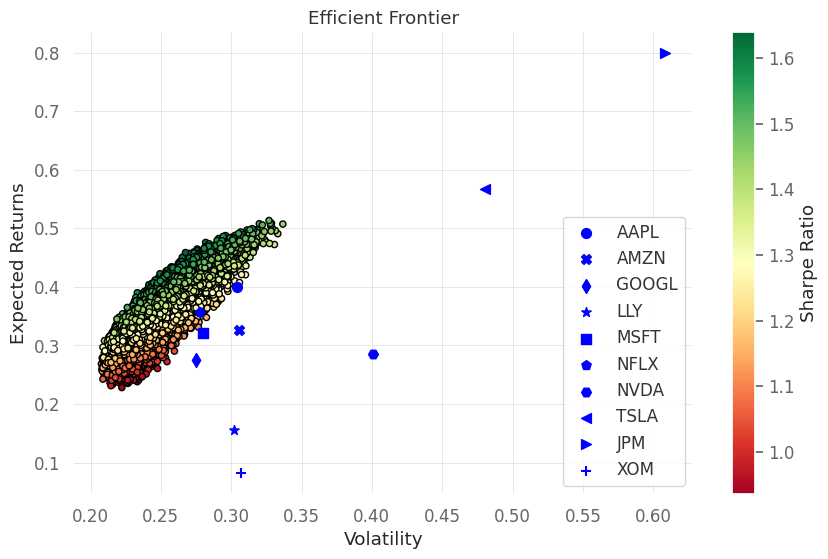

In [ ]:
#Plot the Monte Carlo Chart for phrase 1
fig, ax_1 = plt.subplots()
portf_res_1.plot(kind = 'scatter', x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
               cmap = 'RdYlGn', edgecolors = 'black', ax = ax_1)
ax_1.set(xlabel = 'Volatility', ylabel = 'Expected Returns', title = 'Efficient Frontier')
for idx in range(n_assets):
  ax_1.scatter(x = np.sqrt(cov_matrix_1.iloc[idx, idx]), y = avg_returns_1[idx], marker = markers[idx],
             s = 50, color = 'blue', label = assets[idx])
ax_1.legend()
plt.show()

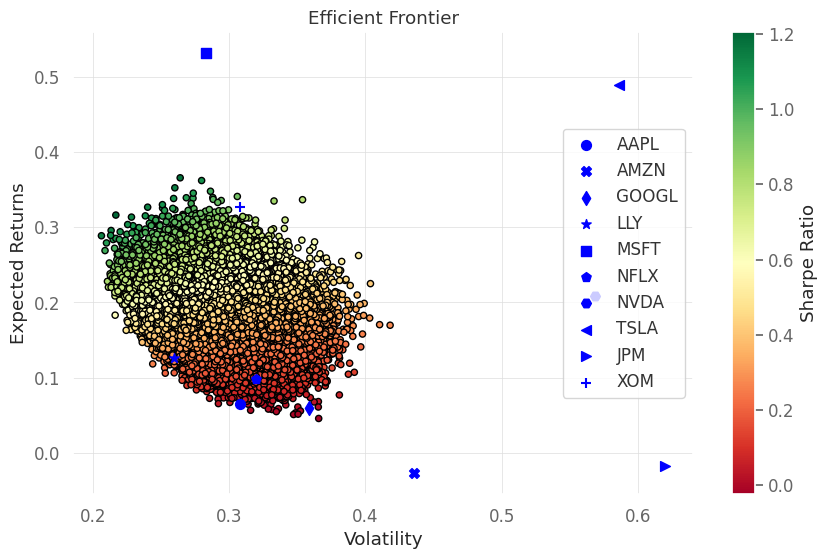

In [ ]:
#Plot the Monte Carlo Chart for phrase 2
fig, ax_2 = plt.subplots()
portf_res_2.plot(kind = 'scatter', x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
               cmap = 'RdYlGn', edgecolors = 'black', ax = ax_2)
ax_2.set(xlabel = 'Volatility', ylabel = 'Expected Returns', title = 'Efficient Frontier')
for idx in range(n_assets):
  ax_2.scatter(x = np.sqrt(cov_matrix_2.iloc[idx, idx]), y = avg_returns_2[idx], marker = markers[idx],
             s = 50, color = 'blue', label = assets[idx])
ax_2.legend()
plt.show()

## Show the highest Sharpe Ratio Portfolio

In [ ]:
"""
    Helper function for printing the performance summary of a portfolio.

    Args:
        perf (pd.Series): Series containing the perf metrics
        weights (np.array): An array containing the portfolio weights
        assets (list): list of the asset names
        name (str): the name of the portfolio
"""

def print_portfolio_summary(perf, weights, assets, name):
    print(f"{name} portfolio ----")
    print("\nPerformance")
    for index, value in perf.items():
        print(f"{index}: {100 * value:.2f}% ", end="", flush=True)
    print("\n\nWeights")
    for x, y in zip(assets, weights):
        print(f"{x}: {100*y:.2f}% ", end="\n", flush=True)
    print('Total weigths: ', 100 * weights.sum())

In [ ]:
#Extract the max_sharpe_ratio from time phrase 1
max_sharpe_ind_1 = np.argmax(portf_res_1['Sharpe Ratio'])
max_sharpe_portf_1 = portf_res_1.loc[max_sharpe_ind]

In [ ]:
print_portfolio_summary(max_sharpe_portf_1, weights[max_sharpe_ind_1],
                        assets, name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----

Performance
Returns: 41.61% Volatility: 24.87% Sharpe Ratio: 159.26% 

Weights
AAPL: 6.93% 
AMZN: 6.48% 
GOOGL: 4.44% 
LLY: 1.74% 
MSFT: 30.83% 
NFLX: 11.97% 
NVDA: 1.28% 
TSLA: 11.40% 
JPM: 22.91% 
XOM: 2.01% 
Total weigths:  100.0


In [ ]:
#Extract the max_sharpe_ratio from time phrase 2
max_sharpe_ind_2 = np.argmax(portf_res_2['Sharpe Ratio'])
max_sharpe_portf_2 = portf_res_2.loc[max_sharpe_ind]

In [ ]:
print_portfolio_summary(max_sharpe_portf_2, weights[max_sharpe_ind_2],
                        assets, name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----

Performance
Returns: 32.25% Volatility: 27.07% Sharpe Ratio: 98.83% 

Weights
AAPL: 3.82% 
AMZN: 0.34% 
GOOGL: 0.09% 
LLY: 13.69% 
MSFT: 30.72% 
NFLX: 4.34% 
NVDA: 9.75% 
TSLA: 3.94% 
JPM: 5.71% 
XOM: 27.60% 
Total weigths:  100.0


## Visualize the Data

In [ ]:
#Construct a compare DataFrame
compare = pd.DataFrame({'Time Phrase 1': weights[max_sharpe_ind_1], 'Time Phrase 2': weights[max_sharpe_ind_2]})
compare.index = assets
compare

,Time Phrase 1,Time Phrase 2
AAPL,0.069339,0.038243
AMZN,0.064755,0.003374
GOOGL,0.044362,0.000886
LLY,0.017438,0.136894
MSFT,0.308268,0.307170
NFLX,0.119717,0.043412
NVDA,0.012850,0.097504
TSLA,0.114030,0.039391
JPM,0.229135,0.057149
XOM,0.020107,0.275978


<Axes: >

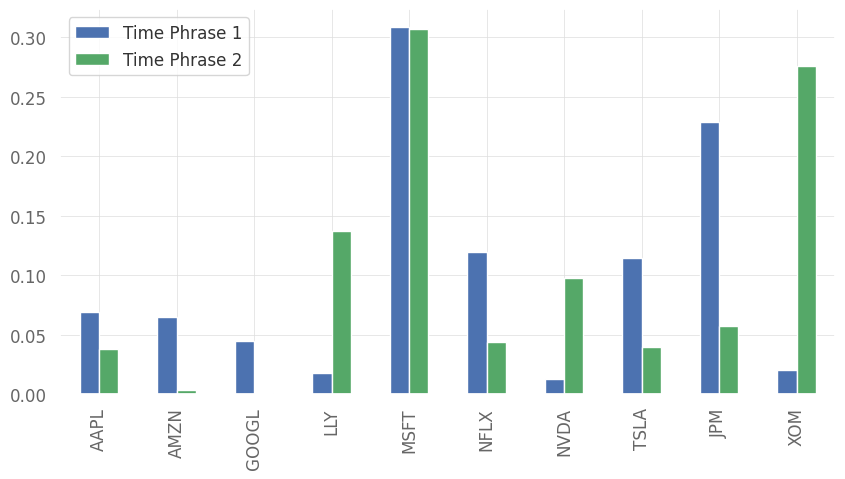

In [ ]:
compare.plot.bar(figsize=(10,5))

# 2. Black-Litterman Model

## Set up the BL package

In [ ]:
!pip install PyPortfolioOpt
import pypfopt
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import EfficientFrontier, objective_functions

## Constructe the prior factors

<Axes: >

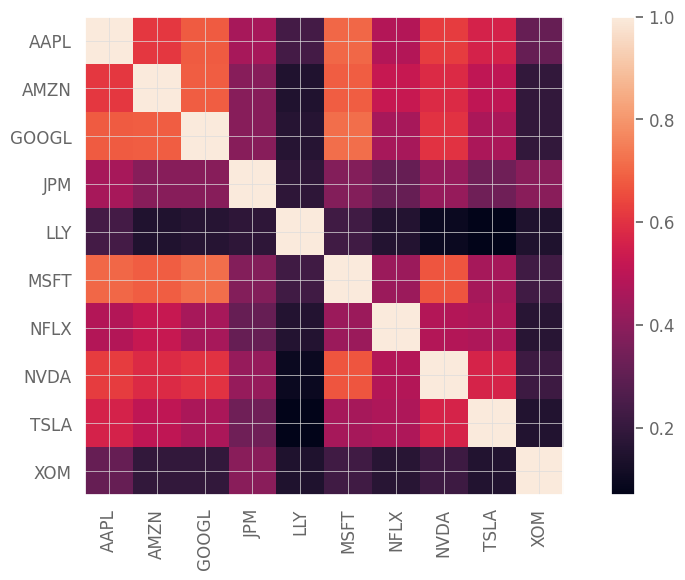

In [ ]:
#Covariance of the assets
portf_cov = risk_models.CovarianceShrinkage(prices['Close'].loc['2022-04-01': ]).ledoit_wolf()
plotting.plot_covariance(portf_cov, plot_correlation=True)

In [ ]:
#Benchmark's delta in Time Phrase 2
benchmark = yf.download('SPY', start= '2022-04-01', period='max', auto_adjust= True)['Close']
delta = black_litterman.market_implied_risk_aversion(benchmark, risk_free_rate = rf_rate_2)
delta

[*********************100%%**********************]  1 of 1 completed


-0.8601790524570653

In [ ]:
#Market Caps of the assets
mcaps = {t : yf.Ticker(t).info['marketCap'] for t in assets}
mcaps

{'AAPL': 2795707564032,
 'AMZN': 1412867948544,
 'GOOGL': 1737815883776,
 'JPM': 430115848192,
 'LLY': 544040943616,
 'MSFT': 2430806523904,
 'NFLX': 174963245056,
 'NVDA': 1073795497984,
 'TSLA': 845392248832,
 'XOM': 465643143168}

In [ ]:
#Compute the prior estimate of returns implied by the market weights
portf_prior = black_litterman.market_implied_prior_returns(mcaps, delta, portf_cov, risk_free_rate = rf_rate_2)
portf_prior

AAPL    -0.014699
AMZN    -0.036065
GOOGL   -0.022254
JPM      0.019577
LLY      0.036529
MSFT    -0.016873
NFLX    -0.030708
NVDA    -0.065398
TSLA    -0.053352
XOM      0.029368
dtype: float64

<Axes: >

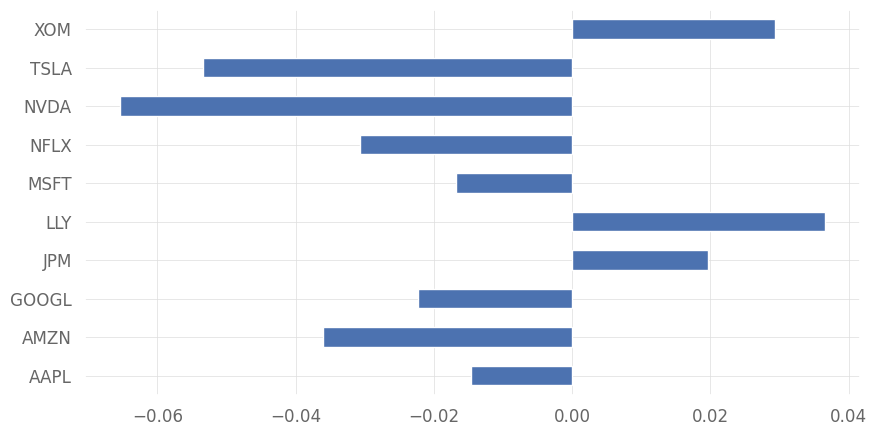

In [ ]:
portf_prior.plot.barh(figsize=(10,5))

## Views in BL model

### Scenario 1: absolute views

In [ ]:
viewdict = {
    "AAPL": 0.10,
    "AMZN": 0.10,
    "GOOGL": 0.15,
    "JPM": 0.05,
    "LLY": 0.15,
    "MSFT": 0.25,
    "NFLX": 0.15,
    "NVDA": 0.1,
    "TSLA": 0.2,
    "XOM": 0.15
    }

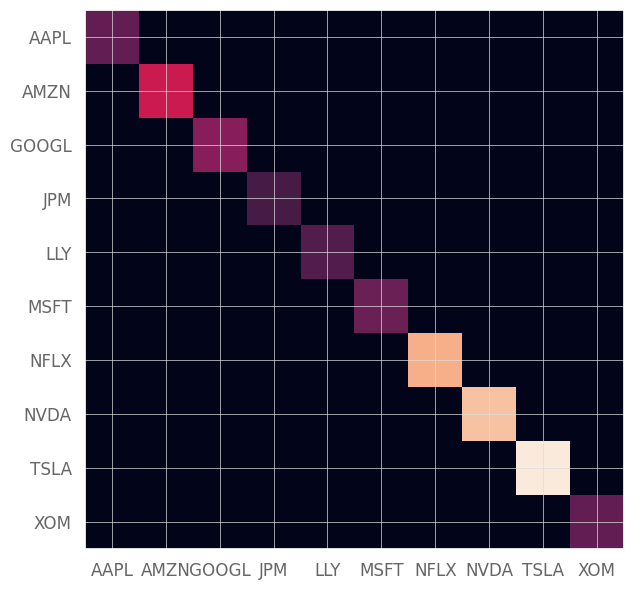

In [ ]:
bl_1 = BlackLittermanModel(portf_cov, pi = portf_prior, absolute_views = viewdict)

fig, ax_3 = plt.subplots(figsize=(7,7))
im = ax_3.imshow(bl_1.omega)

# We want to show all ticks...
ax_3.set_xticks(np.arange(len(bl_1.tickers)))
ax_3.set_yticks(np.arange(len(bl_1.tickers)))

ax_3.set_xticklabels(bl_1.tickers)
ax_3.set_yticklabels(bl_1.tickers)

plt.show()

### Scenario 2: confidence interval views

In [ ]:
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7,
    0.7,
    0.7,
    0.5,
    0.1,
    0.9
]

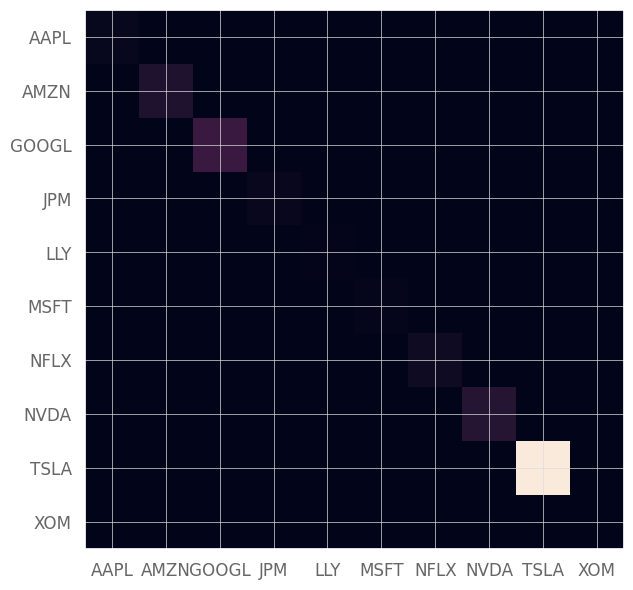

In [ ]:
bl_2 = BlackLittermanModel(portf_cov, pi = portf_prior, absolute_views = viewdict,
                         omega = 'idzorek', view_confidences = confidences)

fig, ax_4 = plt.subplots(figsize=(7,7))
im = ax_4.imshow(bl_2.omega)

# We want to show all ticks...
ax_4.set_xticks(np.arange(len(bl_2.tickers)))
ax_4.set_yticks(np.arange(len(bl_2.tickers)))

ax_4.set_xticklabels(bl_2.tickers)
ax_4.set_yticklabels(bl_2.tickers)
plt.show()

## Posterior estimates

In [ ]:
# Posterior estimate of returns
bl_2_rtns = bl_2.bl_returns()
bl_2_rtns

AAPL     0.113741
AMZN     0.127512
GOOGL    0.123284
JPM      0.077127
LLY      0.127800
MSFT     0.169419
NFLX     0.133861
NVDA     0.136516
TSLA     0.097860
XOM      0.140849
dtype: float64

In [ ]:
#visualise how this compares to the prior and our views:
rtns_df = pd.DataFrame([portf_prior, bl_2_rtns, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rtns_df

,Prior,Posterior,Views
AAPL,-0.014699,0.113741,0.10
AMZN,-0.036065,0.127512,0.10
GOOGL,-0.022254,0.123284,0.15
JPM,0.019577,0.077127,0.05
LLY,0.036529,0.127800,0.15
MSFT,-0.016873,0.169419,0.25
NFLX,-0.030708,0.133861,0.15
NVDA,-0.065398,0.136516,0.10
TSLA,-0.053352,0.097860,0.20
XOM,0.029368,0.140849,0.15


<Axes: >

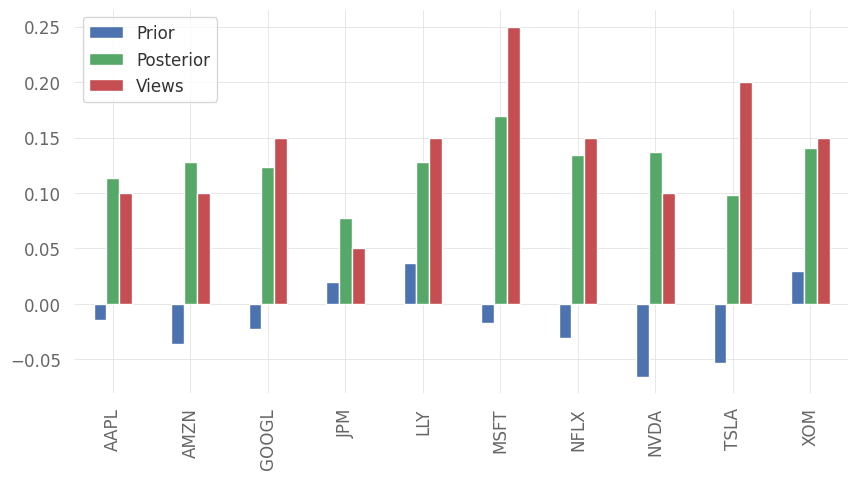

In [ ]:
rtns_df.plot.bar(figsize=(10,5))

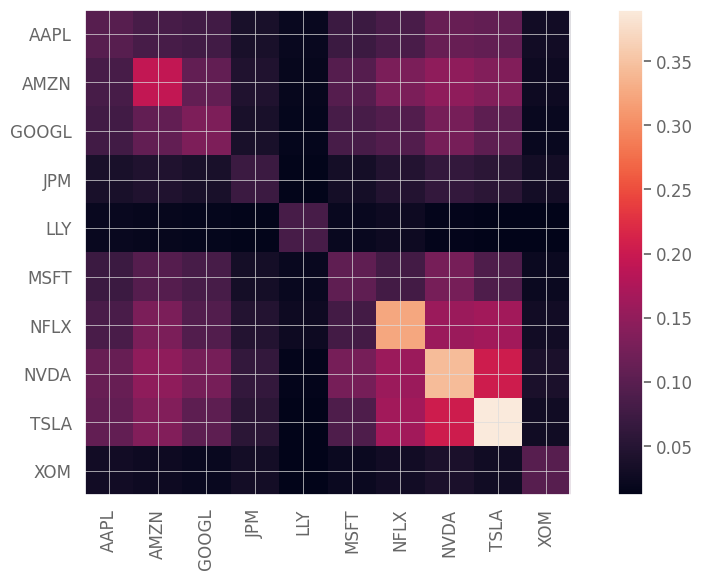

In [ ]:
bl_2_cov = bl_2.bl_cov()
plotting.plot_covariance(bl_2_cov)

In [ ]:
ef = EfficientFrontier(bl_2_rtns, bl_2_cov)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.08767),
             ('AMZN', 0.0876),
             ('GOOGL', 0.09585),
             ('JPM', 0.05469),
             ('LLY', 0.14788),
             ('MSFT', 0.17466),
             ('NFLX', 0.08771),
             ('NVDA', 0.07475),
             ('TSLA', 0.02908),
             ('XOM', 0.16011)])

<Axes: >

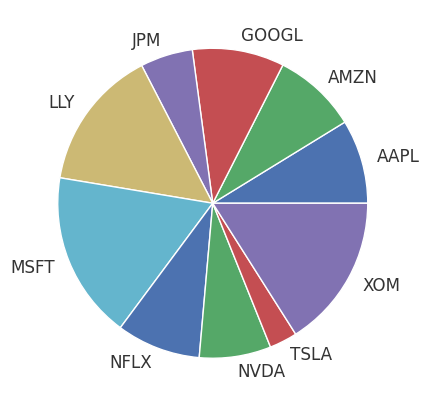

In [ ]:
pd.Series(weights).plot.pie(figsize=(5,10))